Import lines if necessary

In [1]:
#%pip install ucimlrepo
#%pip install seaborn
#%pip install scikit-learn
#%pip install statsmodels


import pandas as pd
import ucimlrepo
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt   
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


Access the dataset and convert into a Pandas dataframe

In [2]:

from ucimlrepo import fetch_ucirepo 
  
# get the dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  

# divide the dataset into features and target (diabetes diagnosis)
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

#combine into 1 dataframe
df = pd.concat([X, y], axis=1)


Display the first 5 rows

In [3]:
print(df.head(5))

   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Diabetes_binary  
0        15         1    0  

Remove duplicated rows

In [4]:
df.shape

(253680, 22)

In [5]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (24206, 22)


In [6]:
df = df.drop_duplicates()
df.head(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


Task 2- Print information about the columns

In [7]:
print(cdc_diabetes_health_indicators.variables) 

                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             

no missing values found

Task 2- Summary statistics

In [8]:
summary_stats = df.describe()
print(summary_stats)

              HighBP       HighChol      CholCheck            BMI  \
count  229474.000000  229474.000000  229474.000000  229474.000000   
mean        0.454343       0.441640       0.959481      28.687507   
std         0.497912       0.496584       0.197173       6.789204   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      32.000000   
max         1.000000       1.000000       1.000000      98.000000   

             Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  229474.00000  229474.000000         229474.000000  229474.000000   
mean        0.46580       0.044816              0.103336       0.733042   
std         0.49883       0.206899              0.304398       0.442371   
min         0.00000       0.000000              0.000000       0.000000   
25%

Task 2- Distribution of diabetes diagnosis

patients with diabetes:  35097


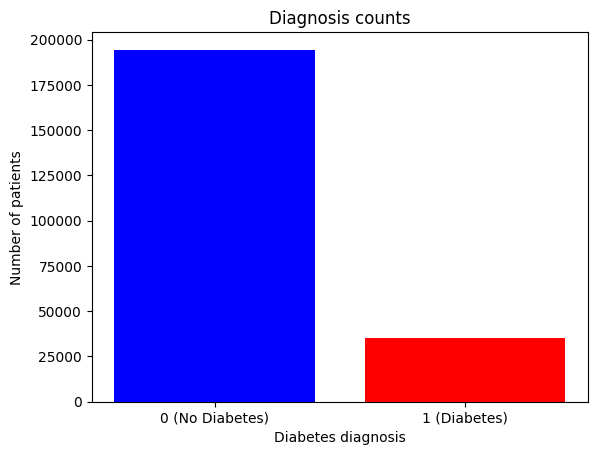

In [9]:
#get the counts for positive and negative
diabetes_pos_count = df[df['Diabetes_binary'] == 1].shape[0]
print("patients with diabetes: ", diabetes_pos_count)

diabetes_neg_count = df[df['Diabetes_binary'] == 0].shape[0]

counts = [diabetes_neg_count, diabetes_pos_count]

plt.bar([0, 1], counts, color=['blue', 'red'])

plt.xlabel('Diabetes diagnosis')
plt.ylabel('Number of patients')
plt.title('Diagnosis counts')
plt.xticks([0, 1], ['0 (No Diabetes)', '1 (Diabetes)'])

plt.show()

Task 2- calculate number of outliers for each integer feature

In [10]:
#based on this source: https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
# select only features with more than 2 values (outliers for binary features doesn't really make sense)
int_columns = df.loc[:, df.nunique() > 2]

q1 = int_columns.quantile(0.25)
q3 = int_columns.quantile(0.75)
IQR = q3 - q1

outliers = ((int_columns < (q1 - 1.5 * IQR)) | (int_columns > (q3 + 1.5 * IQR))).sum()

print("Number of outliers per integer column:\n", outliers)


Number of outliers per integer column:
 BMI           5638
GenHlth      12078
MentHlth     36162
PhysHlth     34346
Age              0
Education        0
Income           0
dtype: int64


Task 2- count the number of unique values for each feature

In [11]:
unique_values = df.nunique()
unique_values

HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
Diabetes_binary          2
dtype: int64

Task 2- visualize distribution of features

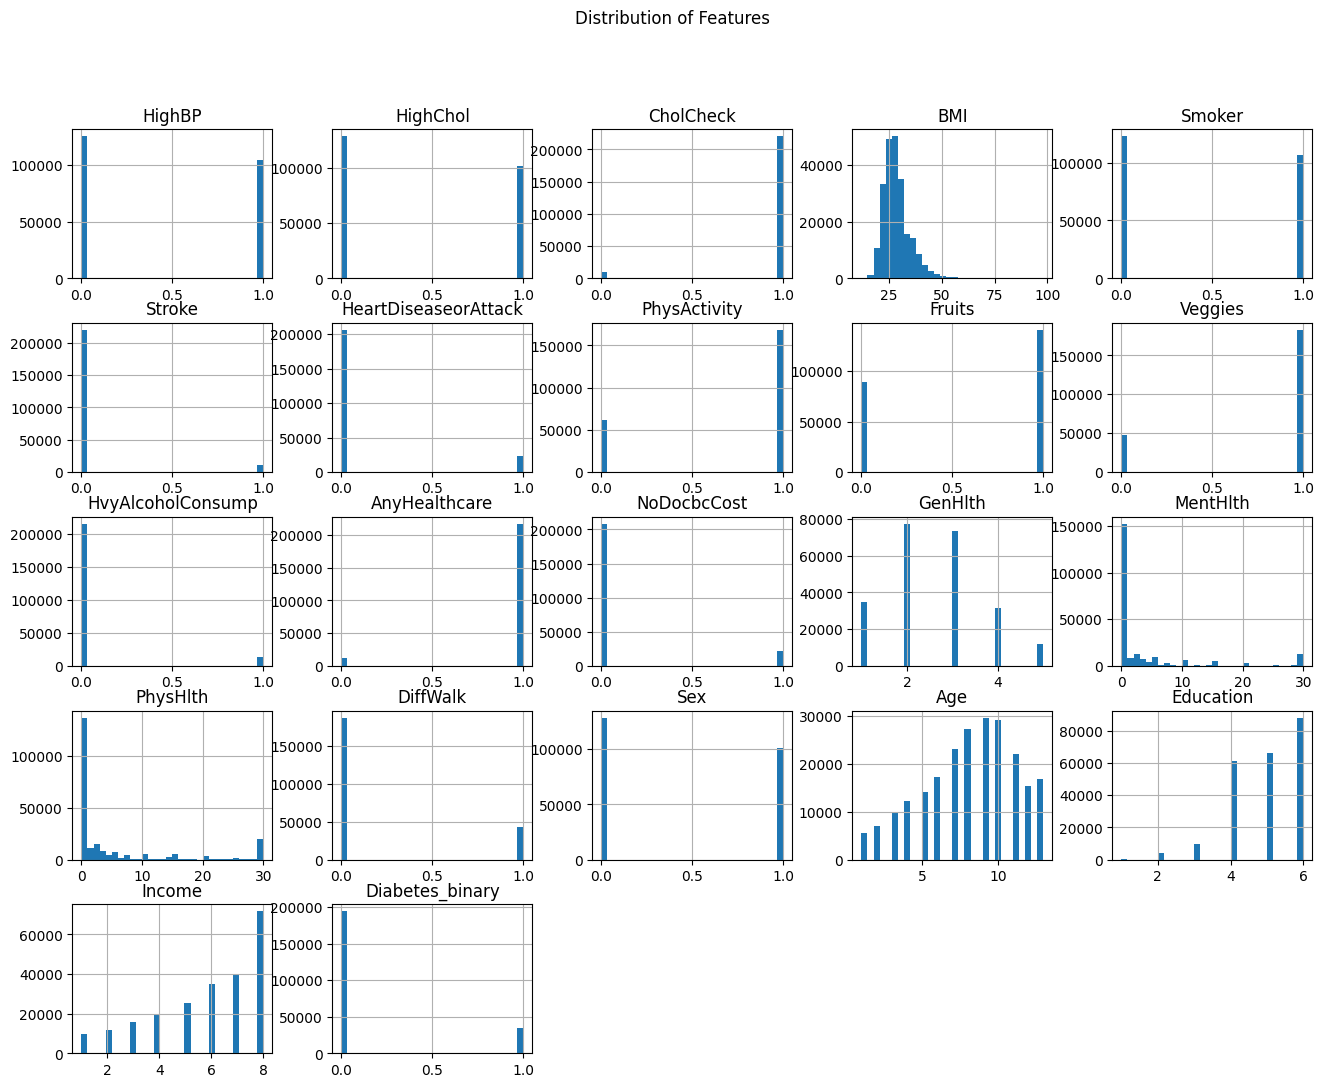

In [12]:
df.hist(bins=30, figsize=(16, 12))
plt.suptitle('Distribution of Features')
plt.show()

Task 3- correlation heatmap

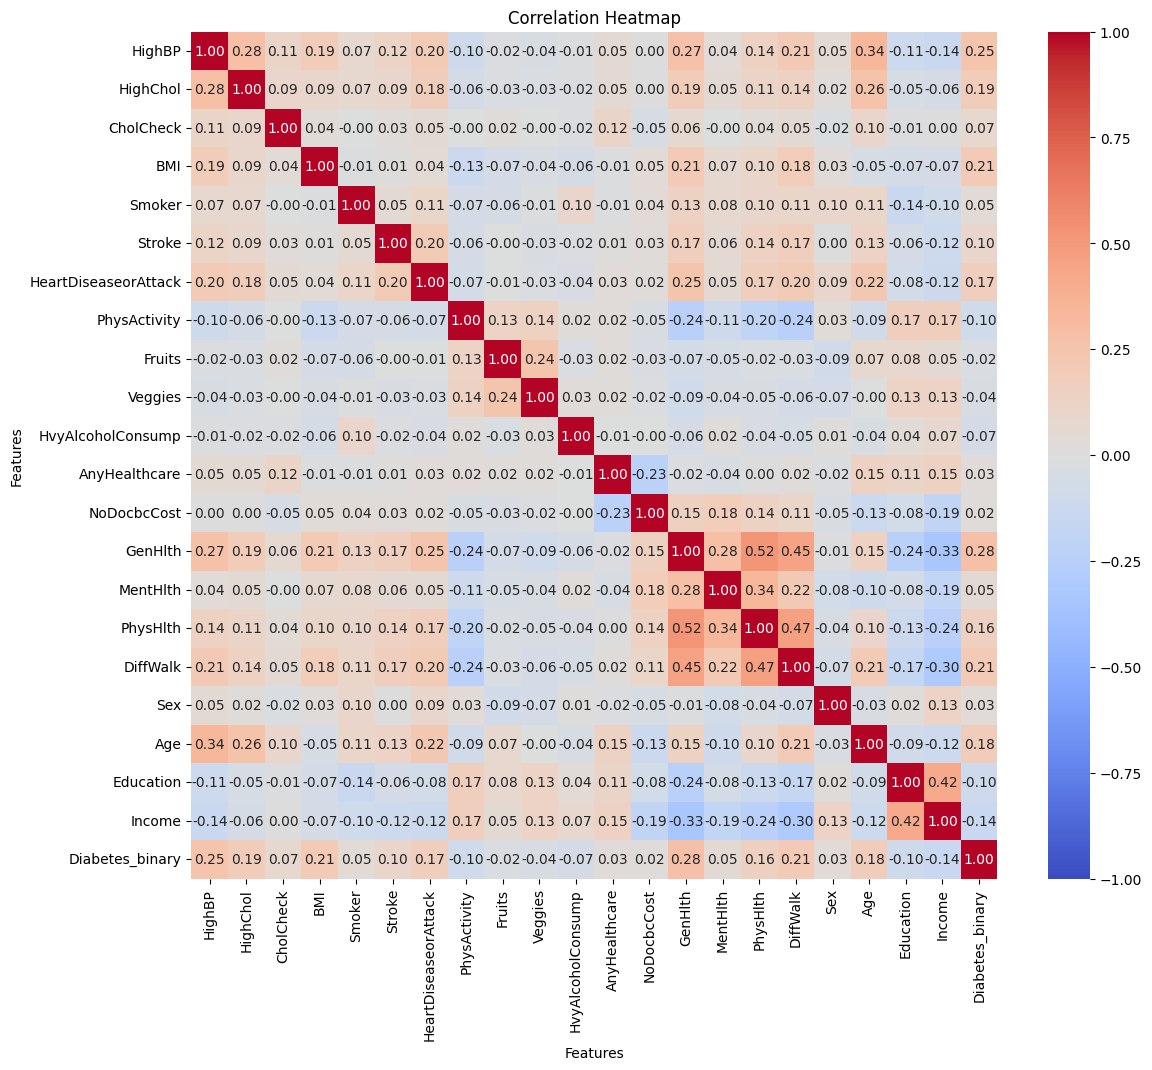

In [13]:
correlation = df.corr()
plt.figure(figsize=(13, 11))  #adjust the figure size

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, xticklabels=correlation.columns, yticklabels=correlation.columns)

plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')

plt.show()

#formatting the heatmap was helped with this source: https://stackoverflow.com/questions/39409866/correlation-heatmap


Task 3-cosine similarity of features with highest correlation values

In [14]:
health_cosine_sim= cosine_similarity(df["PhysHlth"].values.reshape(1, -1), df["GenHlth"].values.reshape(1, -1))
print("Physical health and general health: ", health_cosine_sim)

walk_phys_cosine_sim= cosine_similarity(df["PhysHlth"].values.reshape(1, -1), df["DiffWalk"].values.reshape(1, -1))
print("Physical health and difficulty walking: ", walk_phys_cosine_sim)

walk_gen_cosine_sim= cosine_similarity(df["GenHlth"].values.reshape(1, -1), df["DiffWalk"].values.reshape(1, -1))
print("General health and difficulty walking: ", walk_gen_cosine_sim)

Physical health and general health:  [[0.59894389]]
Physical health and difficulty walking:  [[0.57217849]]
General health and difficulty walking:  [[0.55155907]]


Task 3- Box plot of features against Diabetes_binary

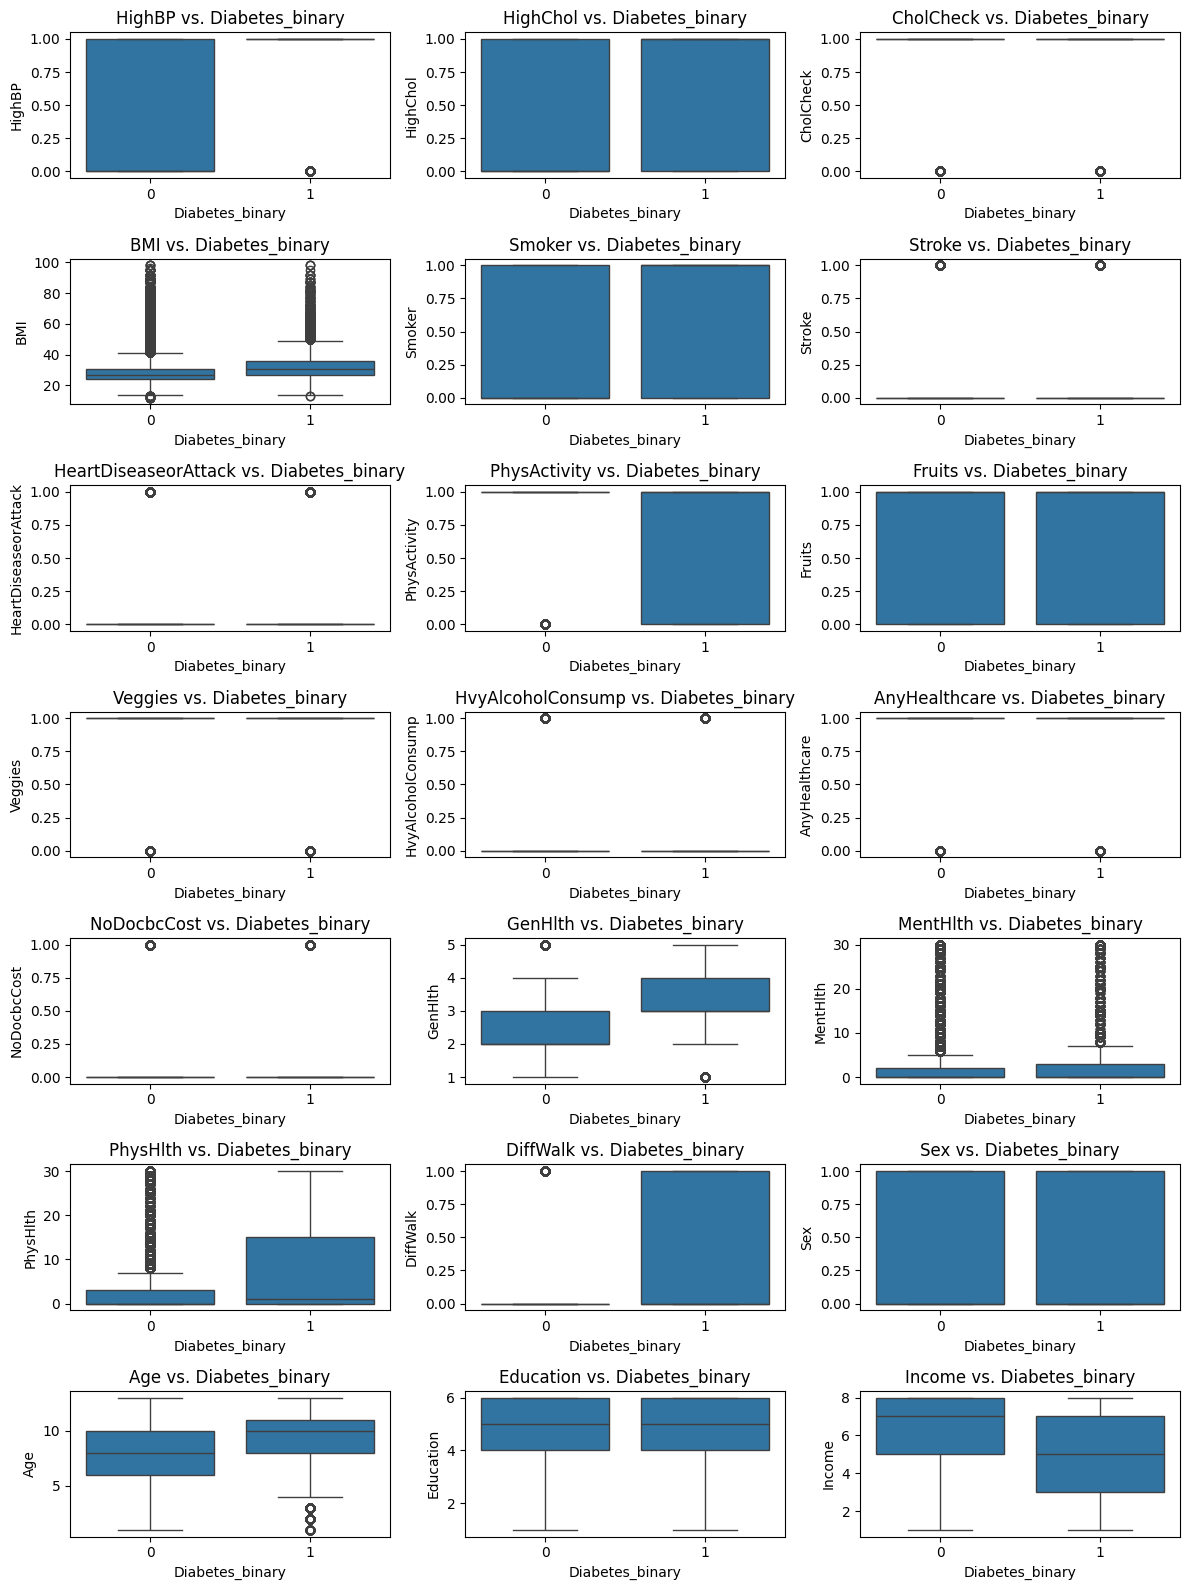

In [15]:
# drop diabetes_binary since we already investigated it in task 2
features = df.columns.drop('Diabetes_binary')

fig, axes = plt.subplots(7, 3, figsize=(12, 16)) #can change number and rows in grid and adjust fig size

# flatten axes for easier iteration
axes = axes.flatten()

# create each plot with diabetes on the x-axis and a feature on the y-axis
for i, col in enumerate(features):
    sns.boxplot(x='Diabetes_binary', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs. Diabetes_binary')

plt.tight_layout() #makes sure the plots don't overlap
plt.show()


Task 3-t test of positive vs negative diagnosis for BMI

In [16]:
#get the two groups for the t test
bmi_diabetic_group = df[df['Diabetes_binary'] == 1]['BMI']
bmi_non_diabetic_group = df[df['Diabetes_binary'] == 0]['BMI']

t_stat, p_val = ttest_ind(bmi_diabetic_group, bmi_non_diabetic_group, equal_var=False)

print(f't-statistic: {t_stat}, p-value: {p_val}\n')

t-statistic: 91.95949548256084, p-value: 0.0



Task 3- chi squared test on categorical features

In [17]:
# get the categorical features (all but BMI)
categorical_features = df.columns.drop(['BMI'])

# perform Chi-Square test for each categorical variable
for col in categorical_features:
    chi2, p, dof, expected = chi2_contingency(pd.crosstab(df[col], df['Diabetes_binary'])) #use crosstab to create the contingency table for frequencies/probabilities
    
    print(f'Chi-Square Test for {col}:')
    print(f'Chi-Square statistic: {chi2}, p-value: {p}\n')

Chi-Square Test for HighBP:
Chi-Square statistic: 14840.421805278642, p-value: 0.0

Chi-Square Test for HighChol:
Chi-Square statistic: 8719.656977878742, p-value: 0.0

Chi-Square Test for CholCheck:
Chi-Square statistic: 1205.9291267293381, p-value: 3.1386083621362587e-264

Chi-Square Test for Smoker:
Chi-Square statistic: 474.89844787950335, p-value: 2.753228537313405e-105

Chi-Square Test for Stroke:
Chi-Square statistic: 2256.534054854552, p-value: 0.0

Chi-Square Test for HeartDiseaseorAttack:
Chi-Square statistic: 6491.585744746344, p-value: 0.0

Chi-Square Test for PhysActivity:
Chi-Square statistic: 2312.7036940053667, p-value: 0.0

Chi-Square Test for Fruits:
Chi-Square statistic: 141.05499501507637, p-value: 1.565008448239026e-32

Chi-Square Test for Veggies:
Chi-Square statistic: 399.38954226812984, p-value: 7.478661503930398e-89

Chi-Square Test for HvyAlcoholConsump:
Chi-Square statistic: 997.3086811901785, p-value: 6.906569461487025e-219

Chi-Square Test for AnyHealthcare

Task 4- How do lifestyle choices (smoking, physical activity, fruits, veggies and alcohol consumption) impact diabetes outcome?

Proportion of Smoker in Diabetic vs. Non-Diabetic groups:
        Diabetes (1)  Non-Diabetes (0)
Smoker                                
0          48.078183         54.384521
1          51.921817         45.615479


Proportion of PhysActivity in Diabetic vs. Non-Diabetic groups:
              Diabetes (1)  Non-Diabetes (0)
PhysActivity                                
1                62.851526         75.191509
0                37.148474         24.808491


Proportion of Fruits in Diabetic vs. Non-Diabetic groups:
        Diabetes (1)  Non-Diabetes (0)
Fruits                                
1          58.423797         61.780972
0          41.576203         38.219028


Proportion of Veggies in Diabetic vs. Non-Diabetic groups:
         Diabetes (1)  Non-Diabetes (0)
Veggies                                
1           75.490783         80.175124
0           24.509217         19.824876


Proportion of HvyAlcoholConsump in Diabetic vs. Non-Diabetic groups:
                   Diabetes (1) 

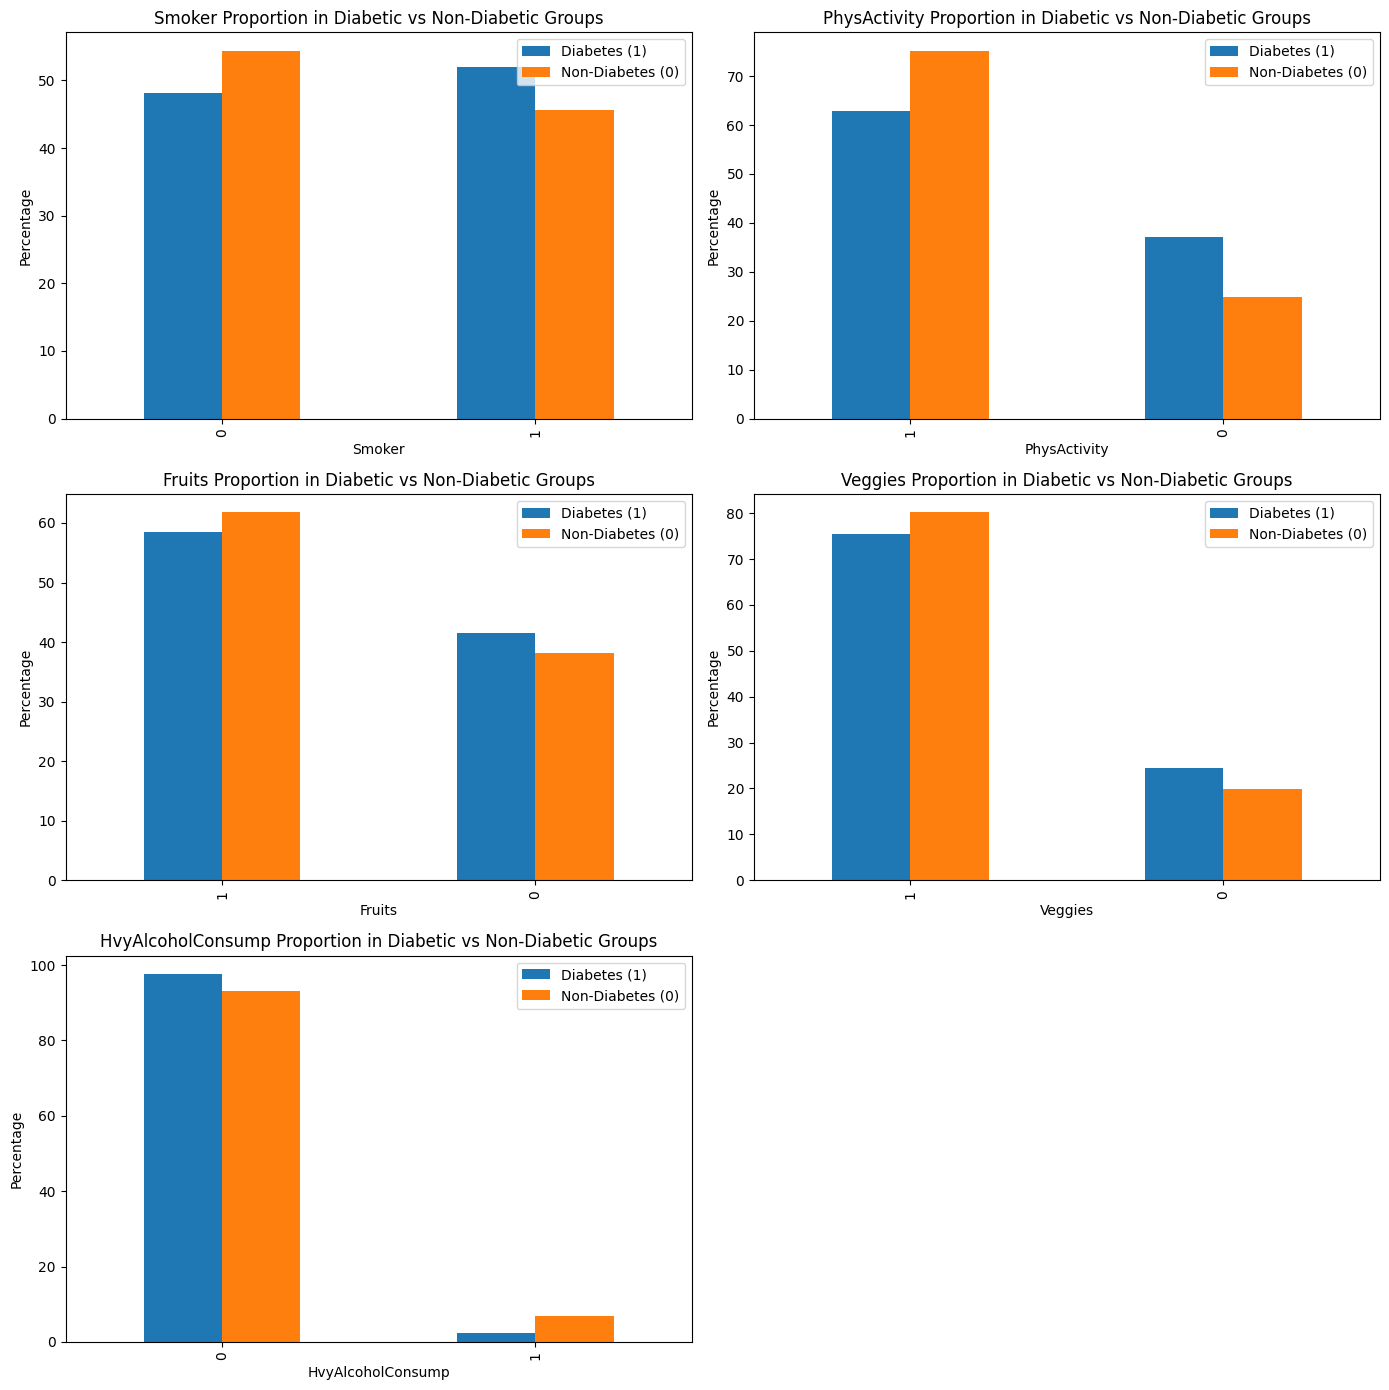

In [18]:
# calculate the proportion of each feature within the diabetes and non diabetes group
#ex calculate the proportion of smoker and non smoker for diabetes and non diabetes

# select only the lifestyle feature columns (all categorical features)
lifestyle_columns = ['Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

# function to calculate the proportion in each group (diabetic vs. non-diabetic)
def calculate_proportion(df, lifestyle_column):
    #calculate the proportion of each subset of the column -->use normalize=True to get proportion rather than raw counts
    diabetes_group = df[df['Diabetes_binary'] == 1][lifestyle_column].value_counts(normalize=True) * 100  #multiply by 100 to get the percentage
    non_diabetes_group = df[df['Diabetes_binary'] == 0][lifestyle_column].value_counts(normalize=True) * 100
    
    # combine into a df
    proportions = pd.DataFrame({
        'Diabetes (1)': diabetes_group,
        'Non-Diabetes (0)': non_diabetes_group
    })
    
    return proportions

# print the results for each column
for column in lifestyle_columns:
    print(f"Proportion of {column} in Diabetic vs. Non-Diabetic groups:")
    print(calculate_proportion(df, column))
    print("\n")

#visualize results using bar charts
#similar process and formatting as above boxplots

fig, axes = plt.subplots(3, 2, figsize=(14, 14)) #can change number and rows in grid and adjust fig size

# flatten axes for easier iteration
axes = axes.flatten()

# create a bar chart for each column
for i, column in enumerate(lifestyle_columns):
    proportions = calculate_proportion(df, column) #call the function to calculate the proportion for each column
    proportions.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{column} Proportion in Diabetic vs Non-Diabetic Groups')
    axes[i].set_ylabel('Percentage')
    axes[i].set_xlabel(column)
   
# Remove the extra bar chart
for j in range(len(lifestyle_columns), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout() #makes sure the plots don't overlap
plt.show()

In [19]:
#interaction effects

# Create interaction terms between lifestyle features
df['Smoker_PhysActivity'] = df['Smoker'] * df['PhysActivity']
df['Smoker_HvyAlcoholConsump'] = df['Smoker'] * df['HvyAlcoholConsump']
df['PhysActivity_HvyAlcoholConsump'] = df['PhysActivity'] * df['HvyAlcoholConsump']
df['Fruits_Veggies'] = df['Fruits'] * df['Veggies']

df_lifestyle = df[lifestyle_columns + ['Smoker_PhysActivity', 'Smoker_HvyAlcoholConsump', 'PhysActivity_HvyAlcoholConsump', 'Fruits_Veggies']]


# define independent(features) and dependent(Diabetes_binary) variables
x_log_reg = df_lifestyle 
y = df['Diabetes_binary']

# add constant for intercept
x_log_reg = sm.add_constant(x_log_reg)

# Fit logistic regression model
log_reg = sm.Logit(y, x_log_reg).fit()

print(log_reg.summary())

#helped using this: https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/


Optimization terminated successfully.
         Current function value: 0.418919
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               229474
Model:                          Logit   Df Residuals:                   229464
Method:                           MLE   Df Model:                            9
Date:                Sun, 15 Sep 2024   Pseudo R-squ.:                 0.02072
Time:                        14:21:27   Log-Likelihood:                -96131.
converged:                       True   LL-Null:                       -98165.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2722      0.020    -64.041     

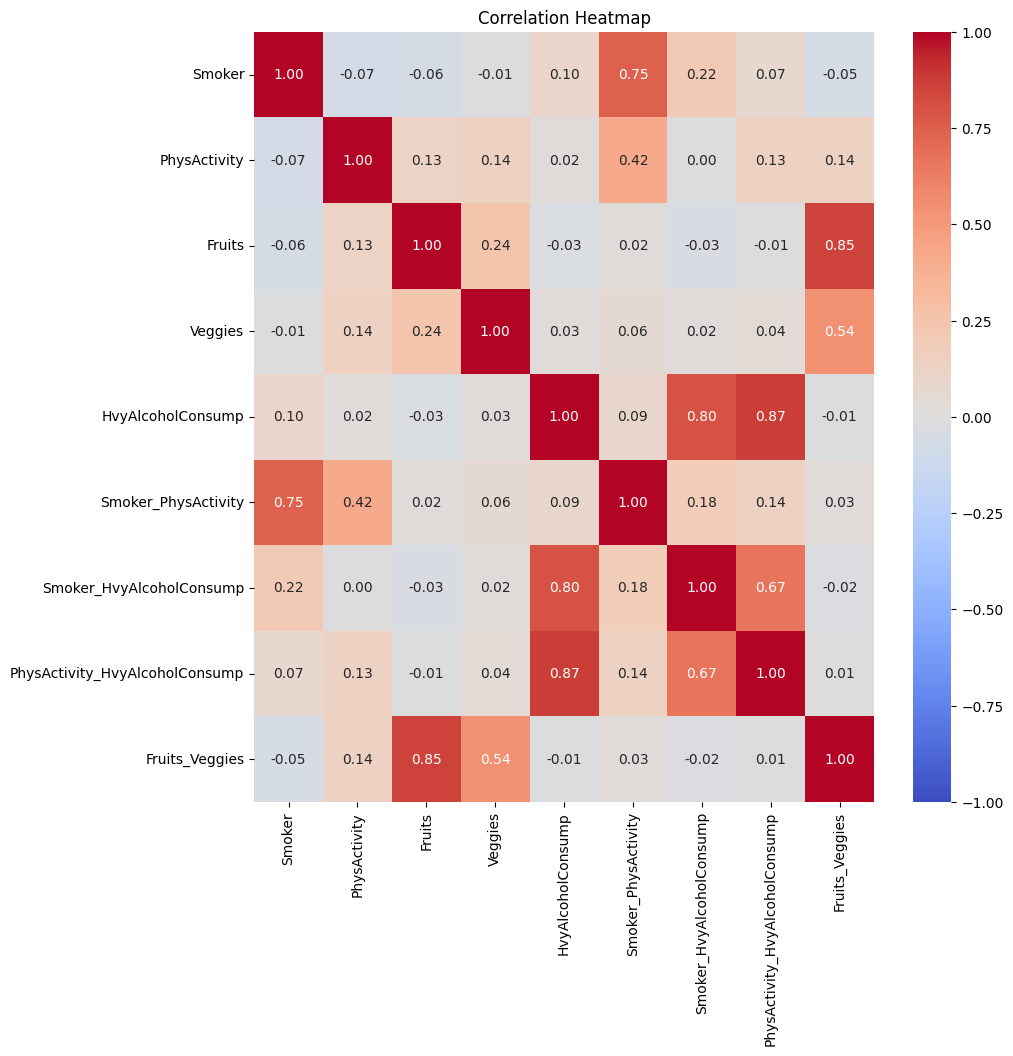

In [20]:
#compute correlation between each feature
#formatting based on above correlation heat map

correlation = df_lifestyle.corr()
plt.figure(figsize=(10, 10))  

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, 
            xticklabels=correlation.columns, yticklabels=correlation.columns)

plt.title('Correlation Heatmap')

plt.show()

Task 4- How does socio economic factors effect diabetes (anyhealthcare, nodocbccost, education, income)?

Proportion of AnyHealthcare in Diabetic vs. Non-Diabetic groups:
               Diabetes (1)  Non-Diabetes (0)
AnyHealthcare                                
1                 95.948372         94.357872
0                  4.051628          5.642128


Proportion of NoDocbcCost in Diabetic vs. Non-Diabetic groups:
             Diabetes (1)  Non-Diabetes (0)
NoDocbcCost                                
0                89.33812         90.955206
1                10.66188          9.044794


Proportion of Education in Diabetic vs. Non-Diabetic groups:
           Diabetes (1)  Non-Diabetes (0)
Education                                
1              0.133915          0.065337
2              3.370658          1.469824
3              6.541870          3.689222
4             31.432886         25.770539
5             29.378579         28.878417
6             29.142092         40.126661


Proportion of Income in Diabetic vs. Non-Diabetic groups:
        Diabetes (1)  Non-Diabetes (0)
Income      

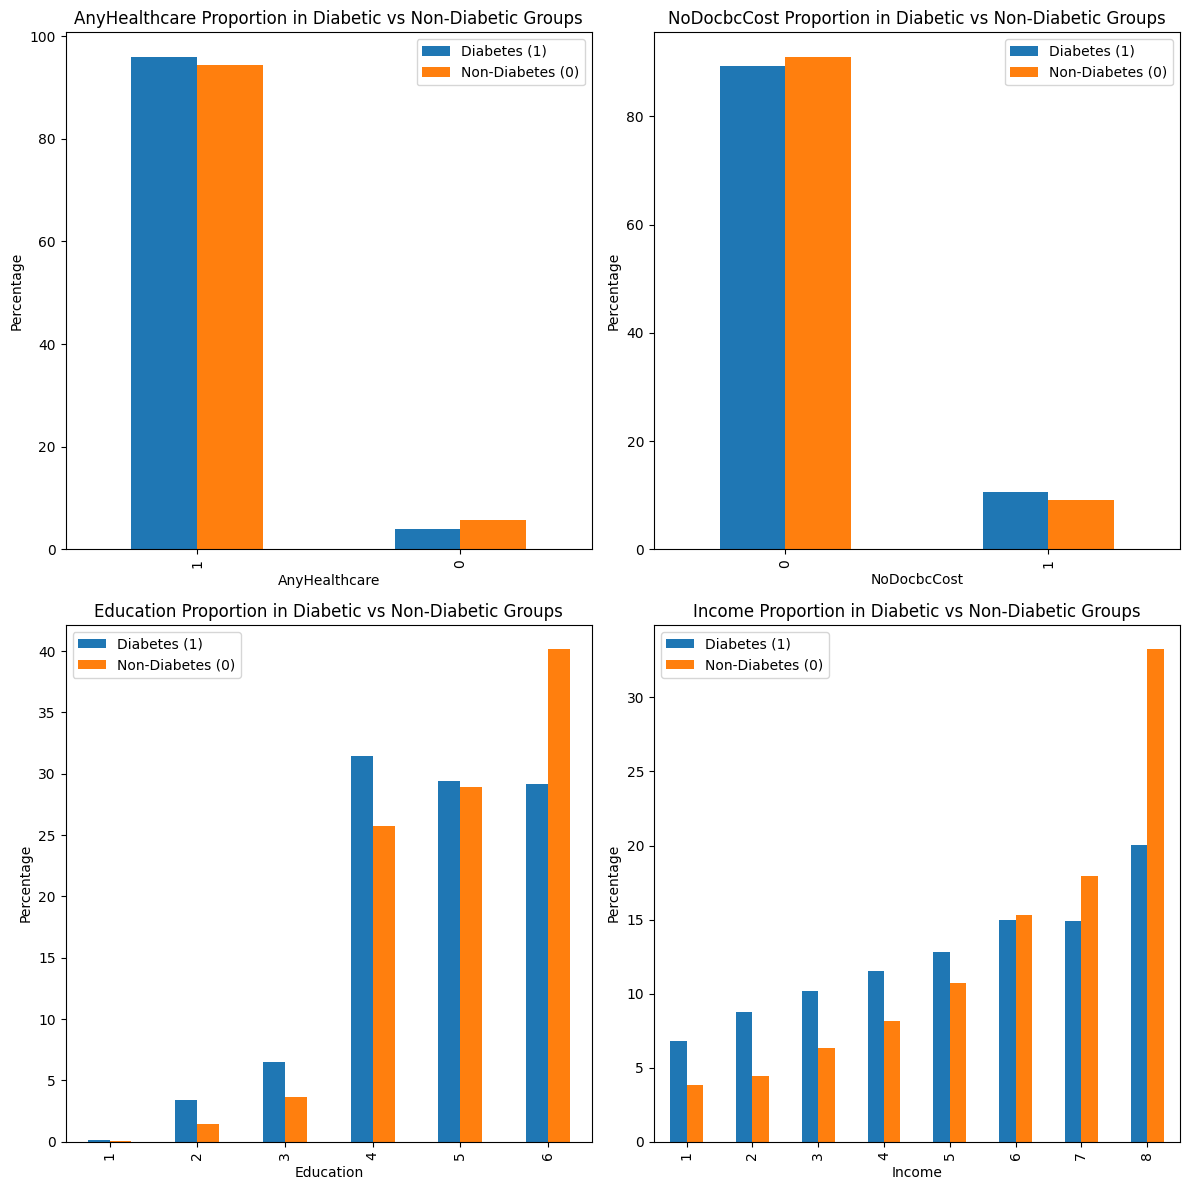

In [21]:
#proportion and bar charts like above
# calculate the proportion of each feature within the diabetes and non diabetes group

# select only the socio economic feature columns (all categorical features)
socio_economic_columns = ['AnyHealthcare', 'NoDocbcCost', 'Education', 'Income']
df_socio_economic = df[socio_economic_columns]

# function to calculate the proportion in each group (diabetic vs. non-diabetic)
def calculate_proportion(df, socio_economic_columns):
    #calculate the proportion of each subset of the column -->use normalize=True to get proportion rather than raw counts
    diabetes_group = df[df['Diabetes_binary'] == 1][socio_economic_columns].value_counts(normalize=True) * 100  #multiply by 100 to get the percentage
    non_diabetes_group = df[df['Diabetes_binary'] == 0][socio_economic_columns].value_counts(normalize=True) * 100
    
    # combine into a df
    proportions = pd.DataFrame({
        'Diabetes (1)': diabetes_group,
        'Non-Diabetes (0)': non_diabetes_group
    })
    
    return proportions

# print the results for each column
for column in socio_economic_columns:
    print(f"Proportion of {column} in Diabetic vs. Non-Diabetic groups:")
    print(calculate_proportion(df, column))
    print("\n")

#visualize results using bar charts
#similar process and formatting as above boxplots

fig, axes = plt.subplots(2, 2, figsize=(12, 12)) #can change number and rows in grid and adjust fig size

# flatten axes for easier iteration
axes = axes.flatten()

# create a bar chart for each column
for i, column in enumerate(socio_economic_columns):
    proportions = calculate_proportion(df, column) #call the function to calculate the proportion for each column
    proportions.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{column} Proportion in Diabetic vs Non-Diabetic Groups')
    axes[i].set_ylabel('Percentage')
    axes[i].set_xlabel(column)
   

plt.tight_layout() #makes sure the plots don't overlap
plt.show()

In [22]:
#stratify by income
income_bins = [1, 2, 3, 4, 5, 6, 7, 8]  #labels in the dataset
income_labels = ['10,000', '15,000', '20,000', '25,000', '35,000', '50,000', '70,000'] #labels according to codebook in metadata
df['Income_Category'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, include_lowest=True)

# check the distribution of income categories
print(df['Income_Category'].value_counts())


Income_Category
70,000    71640
50,000    40131
35,000    34957
25,000    25326
10,000    21547
20,000    19953
15,000    15920
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_11076\1814374123.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  healthcare_proportion = df.groupby('Income_Category')['AnyHealthcare'].value_counts(normalize=True).unstack() * 100


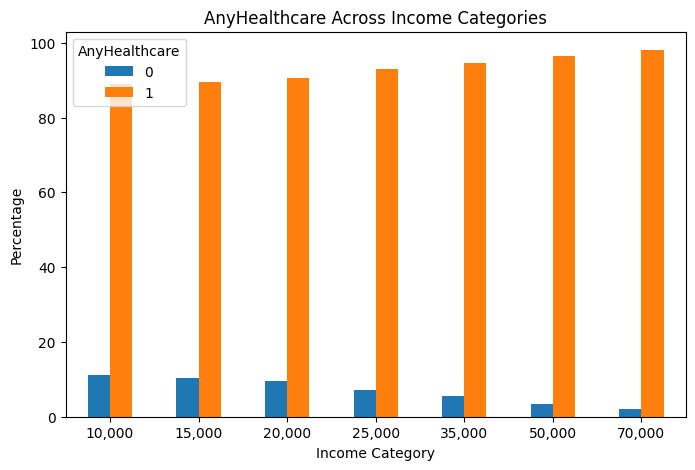

In [23]:
# proportion of people with and without healthcare in each income group
healthcare_proportion = df.groupby('Income_Category')['AnyHealthcare'].value_counts(normalize=True).unstack() * 100

# bar chart
healthcare_proportion.plot(kind='bar', figsize=(8, 5))
plt.title('AnyHealthcare Across Income Categories')
plt.ylabel('Percentage')
plt.xlabel('Income Category')
plt.xticks(rotation=0)
plt.legend(title='AnyHealthcare')
plt.show()

#based on this documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html  

C:\Users\User\AppData\Local\Temp\ipykernel_11076\2650294574.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nodoc_proportion = df.groupby('Income_Category')['NoDocbcCost'].value_counts(normalize=True).unstack() * 100


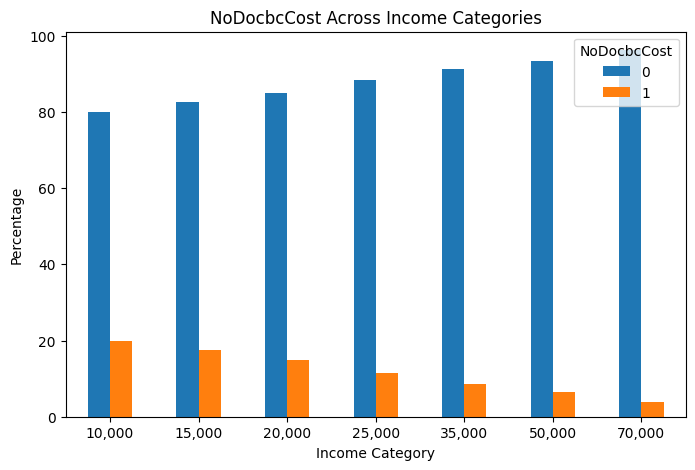

In [24]:
# proportions for not seeing a doctor because of cost
nodoc_proportion = df.groupby('Income_Category')['NoDocbcCost'].value_counts(normalize=True).unstack() * 100

# plot bar chart 
nodoc_proportion.plot(kind='bar', figsize=(8, 5))
plt.title('NoDocbcCost Across Income Categories')
plt.ylabel('Percentage')
plt.xlabel('Income Category')
plt.xticks(rotation=0)
plt.legend(title='NoDocbcCost')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_11076\1673443836.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_proportion = df.groupby('Income_Category')['Education'].value_counts(normalize=True).unstack() * 100


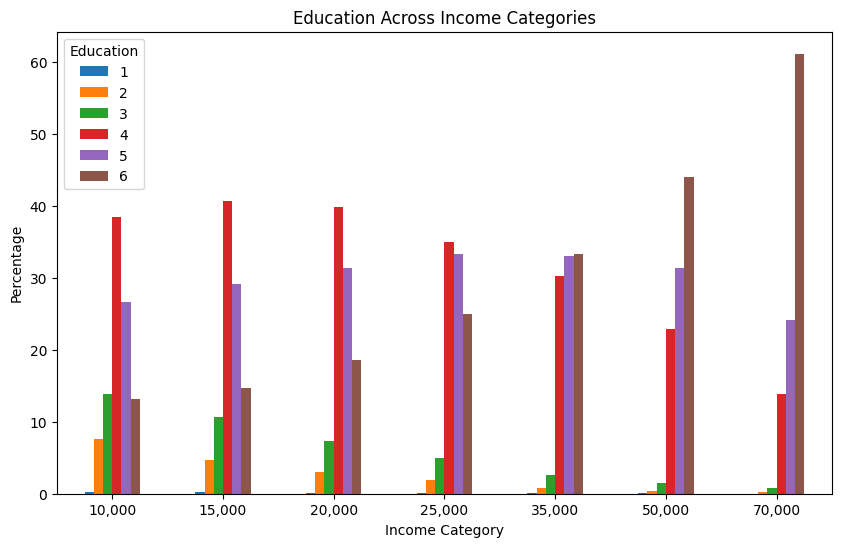

In [25]:
# calculate the proportion of education levels across income groups
education_proportion = df.groupby('Income_Category')['Education'].value_counts(normalize=True).unstack() * 100

# plot the proportions in a bar chart
education_proportion.plot(kind='bar',figsize=(10, 6))
plt.title('Education Across Income Categories')
plt.ylabel('Percentage')
plt.xlabel('Income Category')
plt.xticks(rotation=0)
plt.legend(title='Education')
plt.show()


Task 4- Which features are most important in predicting diabetes?

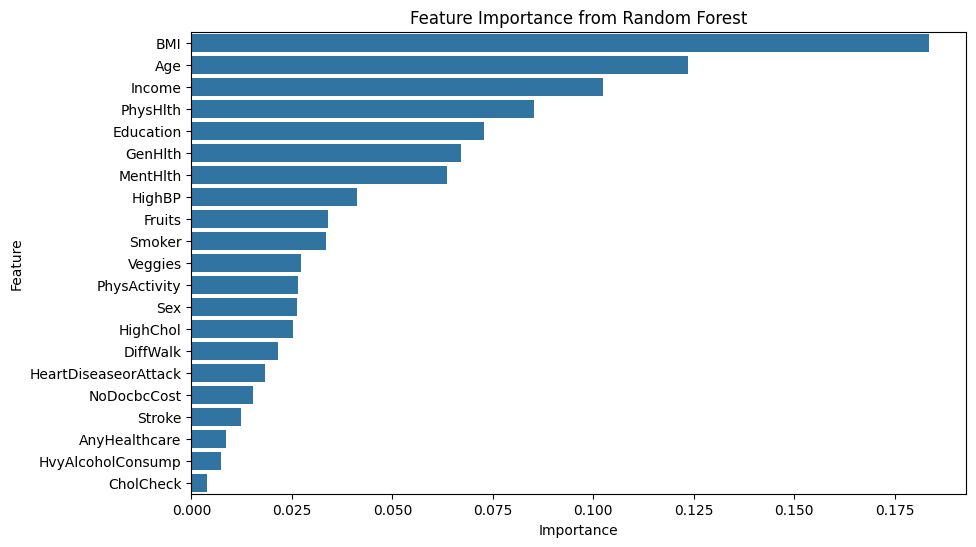

In [26]:
# prepare the df
X_importance = df.drop(columns=['Diabetes_binary', 'Smoker_PhysActivity', 'Smoker_HvyAlcoholConsump', 'PhysActivity_HvyAlcoholConsump', 'Fruits_Veggies', 'Income_Category']) #make sure we're only working with the original features
y = df['Diabetes_binary']

# train Random Forest
model = RandomForestClassifier()
model.fit(X_importance, y)

# calculate feature importances
importances = model.feature_importances_
features = X_importance.columns

# save the feature importance in a df
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# plot results
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

#based on this documentation: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Proportion of BMI_bins in Diabetic vs. Non-Diabetic groups:
          Diabetes (1)  Non-Diabetes (0)
BMI_bins                                
1             0.481523          1.483200
2            11.140553         28.260545
3            30.102288         37.122705
4            58.275636         33.133550


Proportion of Age in Diabetic vs. Non-Diabetic groups:
     Diabetes (1)  Non-Diabetes (0)
Age                                
1        0.222241          2.795084
2        0.398894          3.562150
3        0.894663          4.994933
4        1.780779          5.969842
5        2.988859          6.683404
6        4.960538          7.994259
7        8.752885         10.314492
8       12.083654         11.848624
9       16.186569         12.345596
10      18.471664         11.632035
11      14.502664          8.695988
12       9.639000          6.171512
13       9.117588          6.992082


Proportion of Income in Diabetic vs. Non-Diabetic groups:
        Diabetes (1)  Non-Diabetes (0

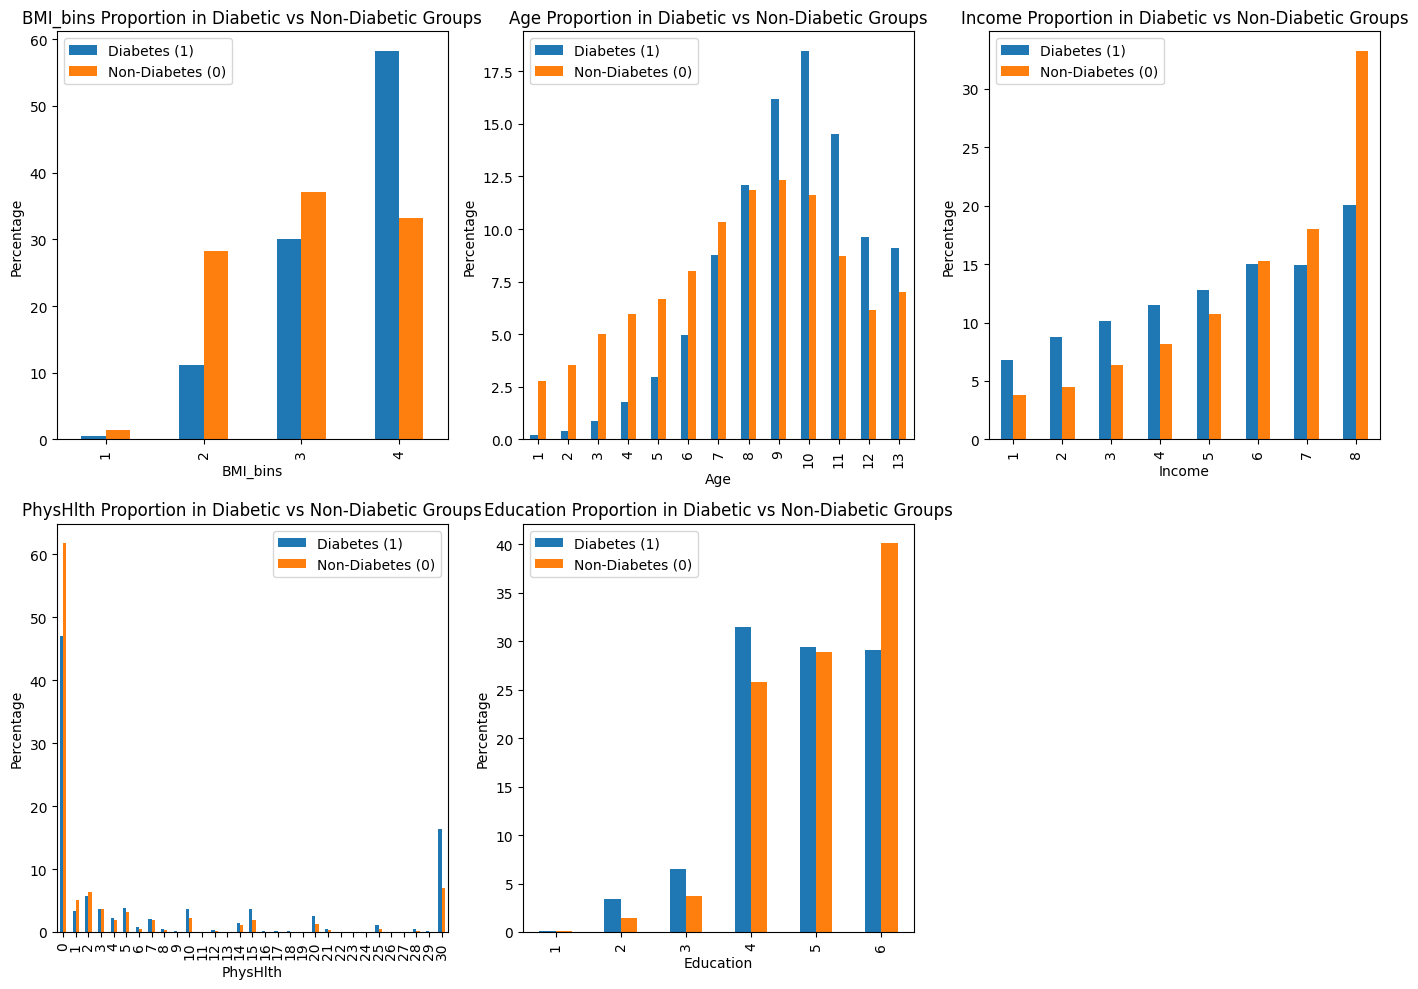

In [27]:
#proportion and bar charts like above
# calculate the proportion of each feature within the diabetes and non diabetes group

#since BMI is a numeric feature, we first need to create bins before calculating the proportions
BMI_bins = [0, 18.5, 24.9, 29.9, float('inf')]
BMI_labels = [1, 2, 3, 4]
df['BMI_bins'] = pd.cut(df['BMI'], bins=BMI_bins, labels=BMI_labels)

# select only the important feature columns
important_features_columns = ['BMI_bins', 'Age', 'Income', 'PhysHlth', 'Education']
df_important_features = df[important_features_columns + ['Diabetes_binary']]

# function to calculate the proportion in each group (diabetic vs. non-diabetic)
def calculate_proportion(df, column):
    diabetes_group = df[df['Diabetes_binary'] == 1][column].value_counts(normalize=True) * 100
    non_diabetes_group = df[df['Diabetes_binary'] == 0][column].value_counts(normalize=True) * 100
    
    # combine into a df
    proportions = pd.DataFrame({
        'Diabetes (1)': diabetes_group,
        'Non-Diabetes (0)': non_diabetes_group
    })
    
    return proportions

# print the results for each column
for column in important_features_columns:
    print(f"Proportion of {column} in Diabetic vs. Non-Diabetic groups:")
    print(calculate_proportion(df_important_features, column))
    print("\n")

#visualize results using bar charts
#similar process and formatting as above boxplots

fig, axes = plt.subplots(2, 3, figsize=(14, 10))  

axes = axes.flatten()

# create a bar chart for each column
for i, column in enumerate(important_features_columns):
    proportions = calculate_proportion(df_important_features, column)
    proportions.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{column} Proportion in Diabetic vs Non-Diabetic Groups')
    axes[i].set_ylabel('Percentage')
    axes[i].set_xlabel(column)

# remove the extra bar chart
for j in range(len(important_features_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  #make sure the plots don't overlap
plt.show()

In [28]:
#interaction effects

# Create interaction terms between top features
df['BMI_Age'] = df['BMI'] * df['Age']
df['BMI_Income'] = df['BMI'] * df['Income']
df['PhysActivity_BMI'] = df['PhysActivity'] * df['BMI']
df['Age_Education'] = df['Age'] * df['Education']

df_top_features = df[important_features_columns + ['BMI_Age', 'BMI_Income', 'PhysActivity_BMI', 'Age_Education']]


# define independent(features) and dependent(Diabetes_binary) variables
x_log_reg = df_top_features 
y = df['Diabetes_binary']

# add constant for intercept
x_log_reg = sm.add_constant(x_log_reg)

# fit logistic regression model
log_reg = sm.Logit(y, x_log_reg).fit()

print(log_reg.summary())

#helped using this: https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/


Optimization terminated successfully.
         Current function value: 0.374288
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               229474
Model:                          Logit   Df Residuals:                   229464
Method:                           MLE   Df Model:                            9
Date:                Sun, 15 Sep 2024   Pseudo R-squ.:                  0.1251
Time:                        14:21:50   Log-Likelihood:                -85889.
converged:                       True   LL-Null:                       -98165.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.2165      0.115    -27.921      0.000      -3.442      -2.991
BMI_bins   

In [29]:
# sample a fraction (10%) of the data --> run into a memory error if I use the entire dataset
df_sample = df.sample(frac=0.1, random_state=42)  
df_top_features_sampled = df_sample[important_features_columns]

# standardize the features 
scaler = StandardScaler()
df_top_features_scaled = scaler.fit_transform(df_top_features_sampled)

# transpose to calculate cosine similarity across features, not samples --> was running into indices issues since Im only looking at 5 columns
df_top_features_scaled_T = df_top_features_scaled.T

# calculate the cosine similarity matrix between features
cosine_sim_matrix = cosine_similarity(df_top_features_scaled_T)

# convert to df to add feature labels
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=important_features_columns, columns=important_features_columns)

print(cosine_sim_df)


#formatting: https://stackoverflow.com/questions/45387476/cosine-similarity-between-each-row-in-a-dataframe-in-python

           BMI_bins       Age    Income  PhysHlth  Education
BMI_bins   1.000000 -0.016922 -0.031291  0.066372  -0.076192
Age       -0.016922  1.000000 -0.117529  0.098125  -0.102001
Income    -0.031291 -0.117529  1.000000 -0.245288   0.422844
PhysHlth   0.066372  0.098125 -0.245288  1.000000  -0.133140
Education -0.076192 -0.102001  0.422844 -0.133140   1.000000


Task 5- Demographic bias

Proportion of Sex in Diabetic vs. Non-Diabetic groups:
     Diabetes (1)  Non-Diabetes (0)
Sex                                
0       52.269425         56.781409
1       47.730575         43.218591


Proportion of Age in Diabetic vs. Non-Diabetic groups:
     Diabetes (1)  Non-Diabetes (0)
Age                                
1        0.222241          2.795084
2        0.398894          3.562150
3        0.894663          4.994933
4        1.780779          5.969842
5        2.988859          6.683404
6        4.960538          7.994259
7        8.752885         10.314492
8       12.083654         11.848624
9       16.186569         12.345596
10      18.471664         11.632035
11      14.502664          8.695988
12       9.639000          6.171512
13       9.117588          6.992082


Proportion of Income in Diabetic vs. Non-Diabetic groups:
        Diabetes (1)  Non-Diabetes (0)
Income                                
1           6.789754          3.811150
2           8.792774       

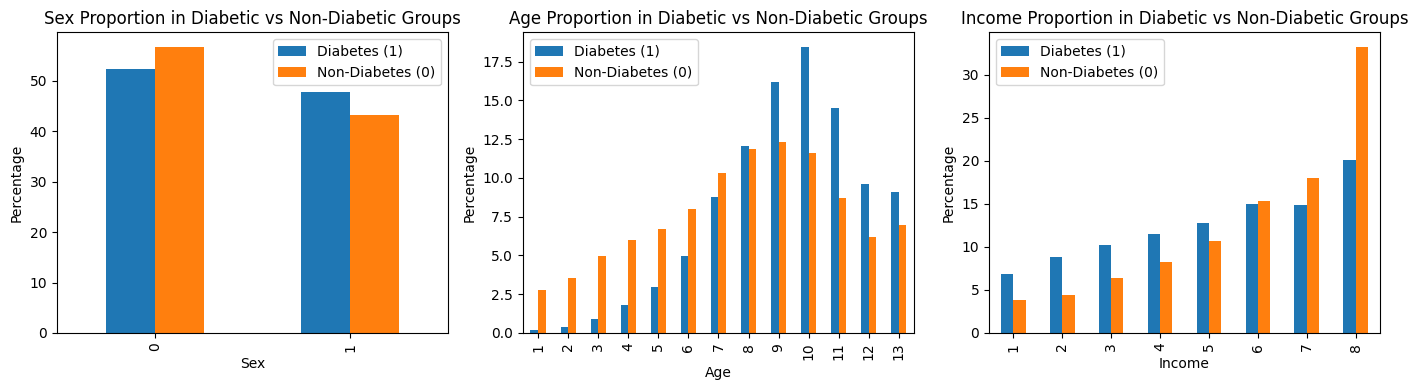

In [30]:
#proportion and bar charts like above
# calculate the proportion of each feature within the diabetes and non diabetes group

# select only the demographic columns
demographic_columns = ['Sex', 'Age', 'Income']
df_demographic_features = df[demographic_columns + ['Diabetes_binary']]

# function to calculate the proportion in each group (diabetic vs. non-diabetic)
def calculate_proportion(df, column):
    diabetes_group = df[df['Diabetes_binary'] == 1][column].value_counts(normalize=True) * 100
    non_diabetes_group = df[df['Diabetes_binary'] == 0][column].value_counts(normalize=True) * 100
    
    # combine into a df
    proportions = pd.DataFrame({
        'Diabetes (1)': diabetes_group,
        'Non-Diabetes (0)': non_diabetes_group
    })
    
    return proportions

# print the results for each column
for column in demographic_columns:
    print(f"Proportion of {column} in Diabetic vs. Non-Diabetic groups:")
    print(calculate_proportion(df_demographic_features, column))
    print("\n")

#visualize results using bar charts
#similar process and formatting as above boxplots

fig, axes = plt.subplots(1, 3, figsize=(14, 4))  

axes = axes.flatten()

# create a bar chart for each column
for i, column in enumerate(demographic_columns):
    proportions = calculate_proportion(df_demographic_features, column)
    proportions.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{column} Proportion in Diabetic vs Non-Diabetic Groups')
    axes[i].set_ylabel('Percentage')
    axes[i].set_xlabel(column)


plt.tight_layout()  #make sure the plots don't overlap
plt.show()

Task 5- Sample size bias

Feature: HighBP
Counts:
 HighBP                0      1
Diabetes_binary               
0                116522  77855
1                  8692  26405
Feature: HighChol
Counts:
 HighChol              0      1
Diabetes_binary               
0                116528  77849
1                 11601  23496
Feature: CholCheck
Counts:
 CholCheck           0       1
Diabetes_binary              
0                9057  185320
1                 241   34856
Feature: BMI
Counts:
 BMI              12  13  14   15   16   17    18    19    20    21  ...  86  \
Diabetes_binary                                                     ...       
0                 6  19  37  120  328  713  1660  3471  5296  7906  ...   1   
1                 0   2   4   12   20   48    83   135   241   479  ...   0   

BMI              87  88  89  90  91  92  95  96  98  
Diabetes_binary                                      
0                52   2  25   1   1  27  11   1   4  
1                 9   0   3   0   0   5   1   0   3

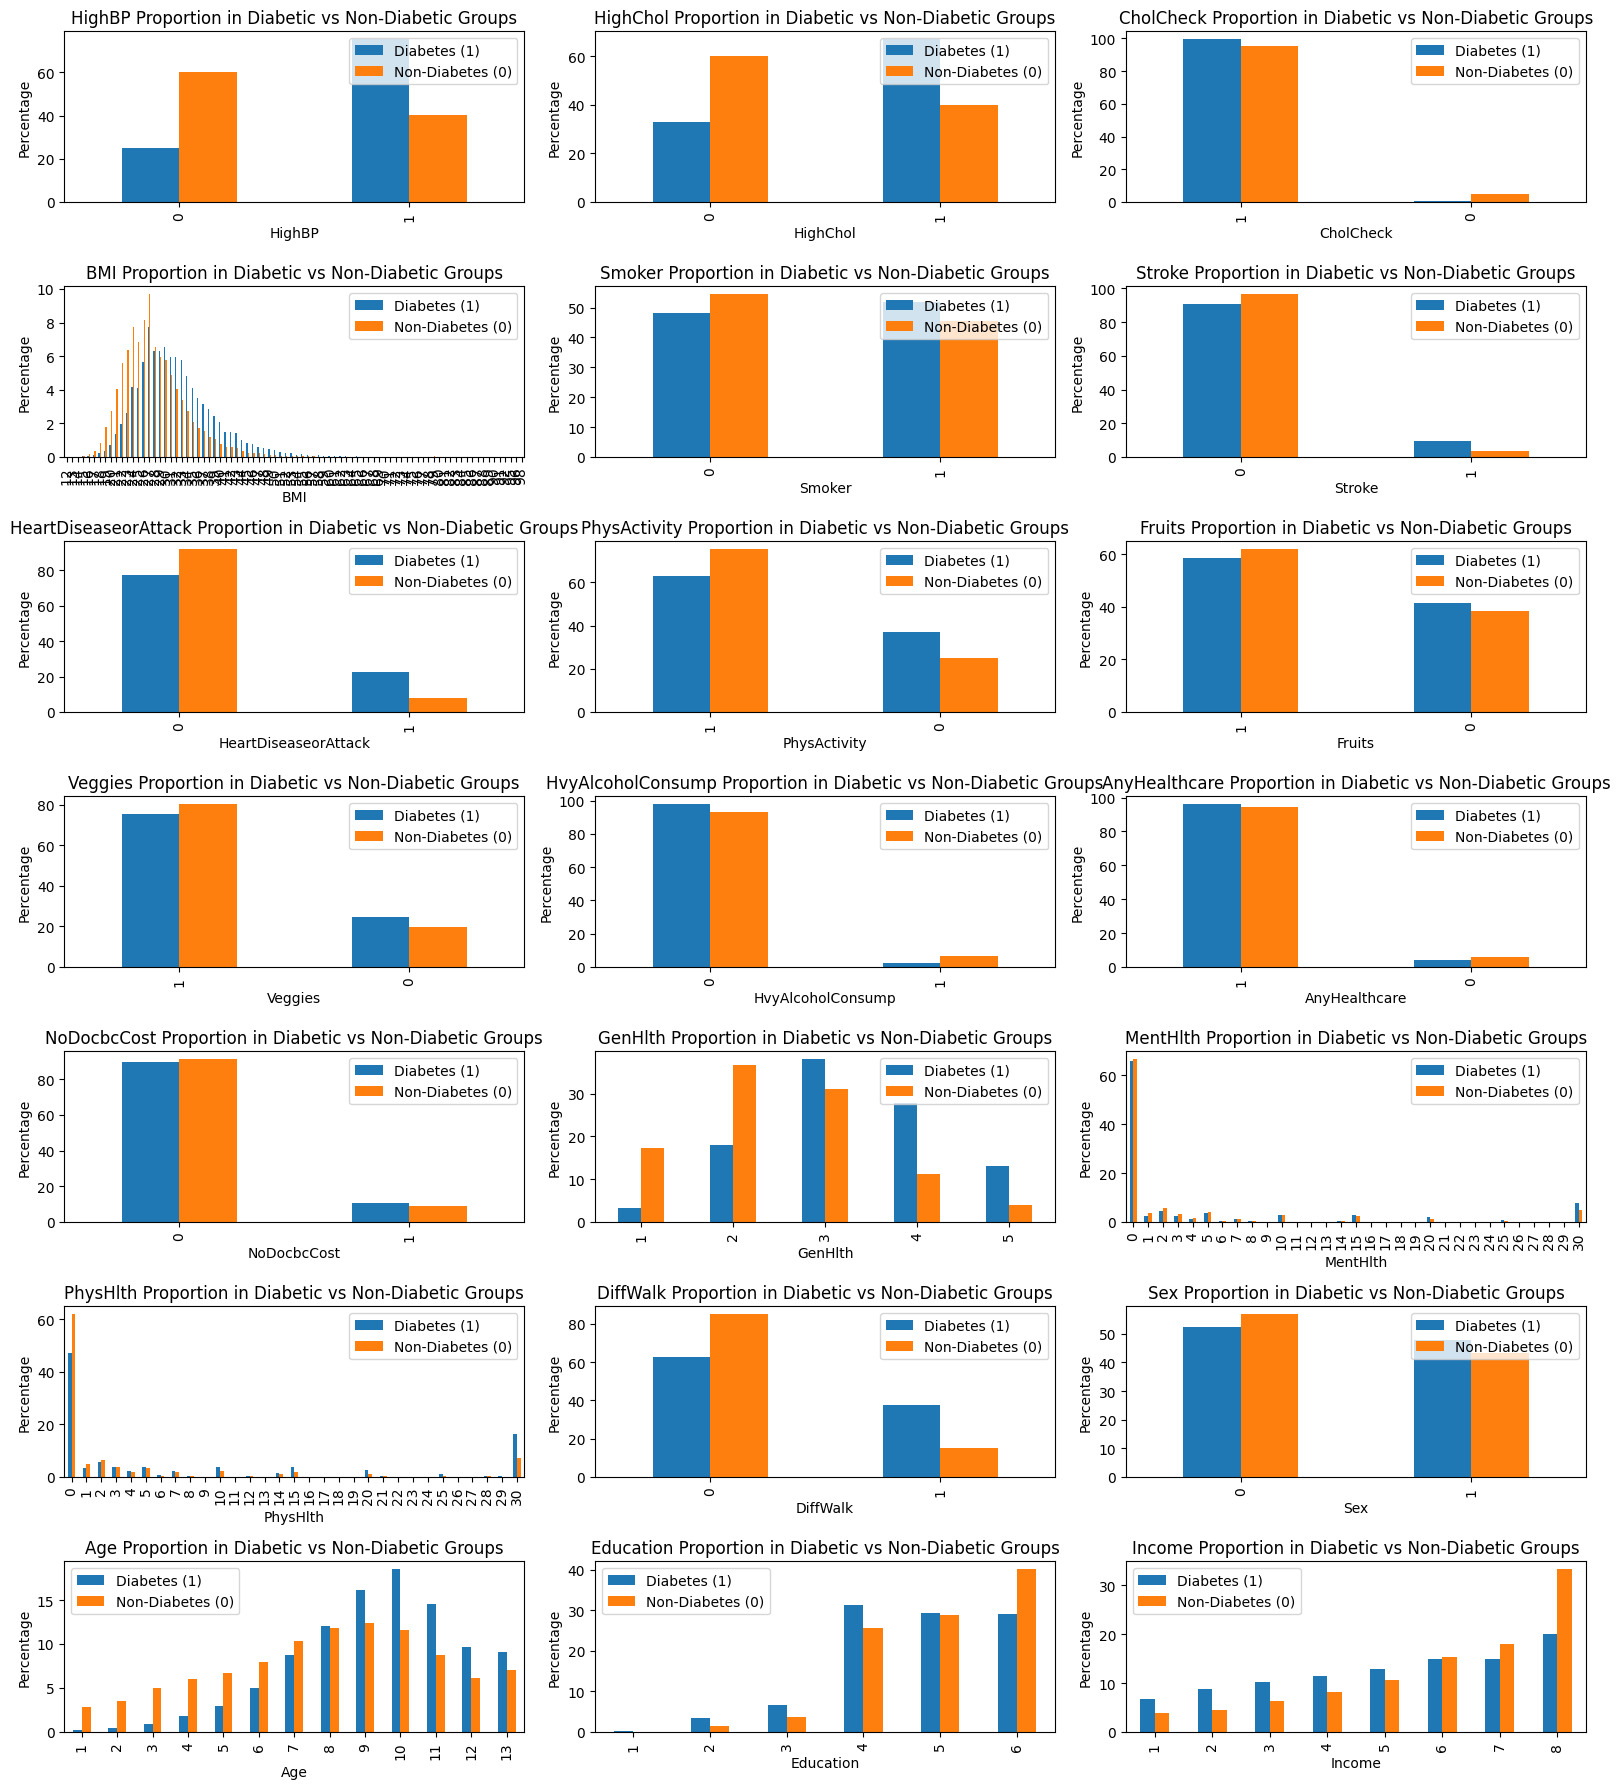

In [31]:
# calculate the proportion in each group (diabetic vs. non-diabetic) and the counts
def calculate_proportion(df, column):
    #calculate proportion
    diabetes_group = df[df['Diabetes_binary'] == 1][column].value_counts(normalize=True) * 100
    non_diabetes_group = df[df['Diabetes_binary'] == 0][column].value_counts(normalize=True) * 100
    
    # Combine into a DataFrame
    proportions = pd.DataFrame({
        'Diabetes (1)': diabetes_group,
        'Non-Diabetes (0)': non_diabetes_group
    })
    print(f"Feature: {column}")
    
    # group by Diabetes_binary and the feature column, and count the occurrences
    counts = df.groupby(['Diabetes_binary', column]).size().unstack(fill_value=0)
    print("Counts:\n", counts)

    return proportions


fig, axes = plt.subplots(7, 3, figsize=(16, 18))  # Adjust figure size

# Flatten axes for easier iteration
axes = axes.flatten()

# Create a bar chart for each column in 'lifestyle_columns'
for i, column in enumerate(features):  # Assuming you're plotting 3 columns at a time
    proportions = calculate_proportion(df, column)
    proportions.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{column} Proportion in Diabetic vs Non-Diabetic Groups')
    axes[i].set_ylabel('Percentage')
    axes[i].set_xlabel(column)

plt.tight_layout()  # Make sure the plots don't overlap
plt.show()


Task 5- bias in distribution of people with diabetes (check pos vs negative distribution)

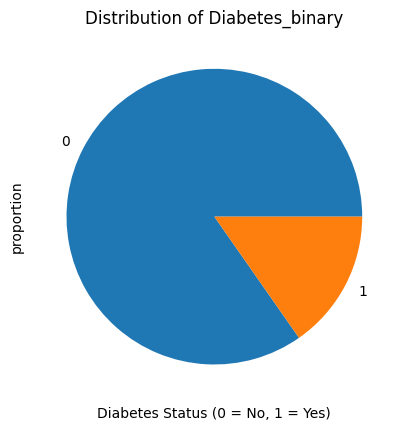

patients with diabetes:  35097
percentage of diabetes:  0.1529454317264701


In [32]:
df['Diabetes_binary'].value_counts(normalize=True).plot(kind='pie')
plt.title('Distribution of Diabetes_binary')
plt.xlabel('Diabetes Status (0 = No, 1 = Yes)')
plt.show()

diabetes_pos_count = df[df['Diabetes_binary'] == 1].shape[0]
print("patients with diabetes: ", diabetes_pos_count)
print("percentage of diabetes: ", diabetes_pos_count/len(df))
